In [51]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [54]:
dir_datos = './Data/Datos_Rotulos_Trafico/'

In [55]:
trayecto_test = os.path.join(dir_datos, 'prueba.p')
trayecto_train = os.path.join(dir_datos, 'entrenamiento.p')
trayecto_validation = os.path.join(dir_datos, 'validacion.p')

In [56]:
if os.path.exists(trayecto_test):
    print("El archivo prueba.p existe en la ruta especificada.")
else:
    raise Exception("El archivo prueba.p no existe en la ruta especificada.")

El archivo prueba.p existe en la ruta especificada.


In [57]:
if os.path.exists(trayecto_train):
    print("El archivo entrenamiento.p existe en la ruta especificada.")
else:
    raise Exception("El archivo entrenamiento.p no existe en la ruta especificada.")

El archivo entrenamiento.p existe en la ruta especificada.


### Obtener Data

In [58]:
import pickle

def get_data(filePath):
    with open(filePath, "rb") as archivo:
        objeto_cargado = pickle.load(archivo)

    y = objeto_cargado.pop('labels')
    x = objeto_cargado.pop('features')
    return x, y

X_train, y_train = get_data(os.path.join(dir_datos, 'entrenamiento.p'))
X_test, y_test = get_data(os.path.join(dir_datos, 'prueba.p'))
X_validation, y_validation = get_data(os.path.join(dir_datos, 'validacion.p'))

### Se validan las dimensiones de las imagenes

In [59]:
last = X_train[0].shape
diferencia = False

for img in X_train:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de entreno')

else:
    print('No hay dimensiones diferentes en las imagenes de entreno')

last = X_test[0].shape
diferencia = False

for img in X_test:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de testing')

else:
    print('No hay dimensiones diferentes en las imagenes de testing')

last = X_validation[0].shape
diferencia = False

for img in X_validation:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de Validacion')

else:
    print('No hay dimensiones diferentes en las imagenes de Validacion')


No hay dimensiones diferentes en las imagenes de entreno
No hay dimensiones diferentes en las imagenes de testing
No hay dimensiones diferentes en las imagenes de Validacion


### Normalizacion

In [61]:
X_train[0].min()

19

In [62]:
X_train[0].max()

113

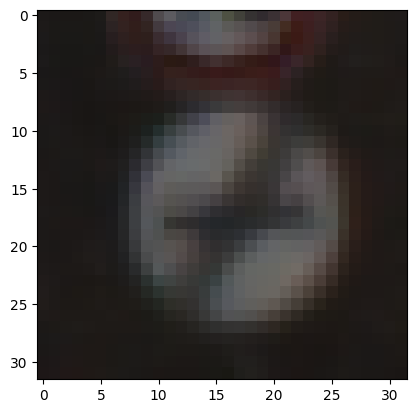

In [63]:
plt.imshow(X_train[0])

In [64]:
X_train = X_train / 255
X_test = X_test / 255
X_validation = X_validation / 255

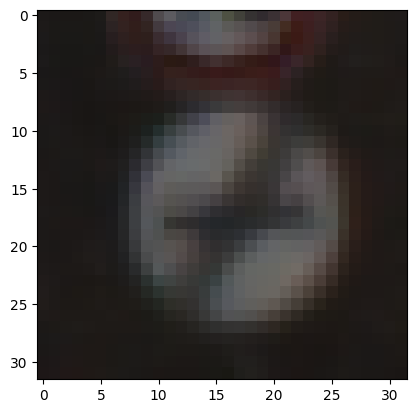

In [65]:
plt.imshow(X_train[0])

In [66]:
X_train.shape

(34799, 32, 32, 3)

### Entreno

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Conv3D

In [68]:
modelo = Sequential()

# Capa convolucional
modelo.add(Conv2D(filters = 6, kernel_size = (5, 5), input_shape = (32, 32, 3), activation = 'relu'))
# Capa pooling
modelo.add(MaxPool2D(pool_size = (2, 2)))


modelo.add(Conv2D(filters = 16, kernel_size = (5, 5), input_shape = (32, 32, 3), activation = 'relu'))

# Capa pooling
modelo.add(MaxPool2D(pool_size = (2, 2)))

# Capa aplanada
modelo.add(Flatten())

# Hidden layers
modelo.add(Dense(120, activation = 'relu'))
modelo.add(Dense(84, activation = 'relu'))
# Clasificadora (softmax)
modelo.add(Dense(43, activation='softmax'))

In [69]:
import tensorflow as tf
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

modelo.build((32, 32, 3))
modelo.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 120)             

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

modelo.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_test, y_test),
    callbacks = [detencion_temprana]
)

Epoch 1/10
1088/1088 [==============================] - 18s 13ms/step - loss: 1.2214 - accuracy: 0.6650 - val_loss: 0.8096 - val_accuracy: 0.8069
Epoch 2/10
1088/1088 [==============================] - 12s 11ms/step - loss: 0.2753 - accuracy: 0.9229 - val_loss: 0.6600 - val_accuracy: 0.8624
Epoch 3/10
1088/1088 [==============================] - 13s 12ms/step - loss: 0.1529 - accuracy: 0.9591 - val_loss: 0.6006 - val_accuracy: 0.8797
Epoch 4/10
1088/1088 [==============================] - 13s 12ms/step - loss: 0.1075 - accuracy: 0.9711 - val_loss: 0.5376 - val_accuracy: 0.8962
Epoch 5/10
1088/1088 [==============================] - 12s 11ms/step - loss: 0.0815 - accuracy: 0.9776 - val_loss: 0.5734 - val_accuracy: 0.8950
Epoch 6/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.0611 - accuracy: 0.9829 - val_loss: 0.5551 - val_accuracy: 0.9040


### Testing

       loss  accuracy  val_loss  val_accuracy
0  1.221362  0.664962  0.809593      0.806888
1  0.275304  0.922929  0.660015      0.862391
2  0.152949  0.959137  0.600581      0.879731
3  0.107516  0.971120  0.537615      0.896200
4  0.081455  0.977557  0.573367      0.895012


<Axes: >

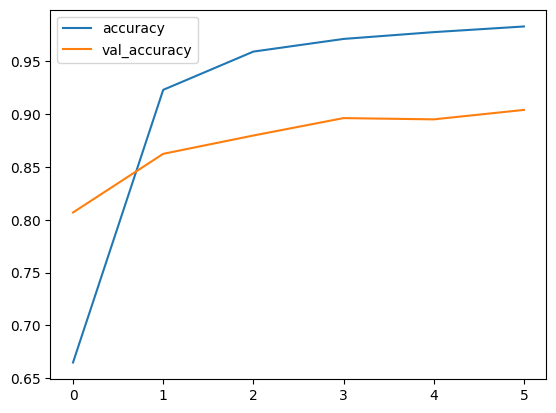

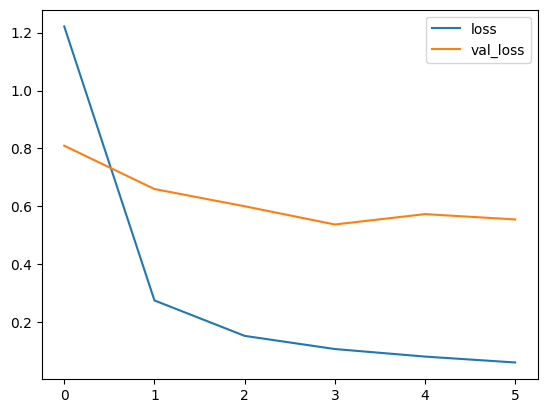

In [71]:
modelo.metrics_names
metricas = pd.DataFrame(modelo.history.history)
print(metricas.head())
metricas[['accuracy', 'val_accuracy']].plot()
metricas[['loss', 'val_loss']].plot()

In [72]:
print(modelo.metrics_names)
print(modelo.evaluate(X_test, y_test, verbose = 0))

['loss', 'accuracy']
[0.5550875663757324, 0.9039588570594788]
